In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os
import warnings
warnings.filterwarnings('ignore')

# Check available files
print("Available files in working directory:")
for file in os.listdir('.'):
    if file.endswith(('.csv', '.pdb', '.fasta', '.txt')):
        print(f"  - {file}")


Available files in working directory:
  - 2VSM.pdb
  - 1E5_CDR_grafted_designs_top50.csv
  - top_50_allosteric_binder_designs.csv
  - multi_cdr_designs_scores.csv
  - cdr_library_summary.csv


In [ ]:

# Notice: top_50_nivg_binder_designs_final.csv is missing from the directory
# Let's check if it exists or if we need to search for it
import glob

all_files = os.listdir('.')
print("All files in directory:")
for f in all_files:
    print(f"  - {f}")


All files in directory:
  - Surface-Plasmon-Resonance-Adaptyv-Bio-Docs.pdf
  - 2VSM.pdb
  - 1E5_CDR_grafted_designs_top50.csv
  - top_50_allosteric_binder_designs.csv
  - multi_cdr_designs_scores.csv
  - cdr_library_summary.csv
  - .config
  - .kernel_tmp
  - notebook.ipynb


In [ ]:

# top_50_nivg_binder_designs_final.csv is missing from the working directory
# According to the dataset description, this file should contain 14F8-based designs
# I cannot fabricate data, so I will proceed with the three available design files

# Load available design files
print("Loading available design files...\n")

# 1. Load 1E5-based designs
df_1e5 = pd.read_csv('1E5_CDR_grafted_designs_top50.csv')
print(f"1E5 CDR designs: {len(df_1e5)} designs")
print(f"Columns: {list(df_1e5.columns)}")
print(df_1e5.head(3))
print()


Loading available design files...

1E5 CDR designs: 50 designs
Columns: ['Design_ID', 'Scaffold', 'CDR', 'CDR_Sequence', 'CDR_Length', 'Loop_Position', 'Loop_Index', 'Original_Loop', 'Original_Loop_Length', 'Grafted_Sequence', 'Grafted_Length', 'Scaffold_Length', 'Empirical_Score', 'Loop_Score']
            Design_ID Scaffold CDR       CDR_Sequence  CDR_Length  \
0      1E5_1FNA_L4_H3     1FNA  H3  ARDYQYYYSGSYPTPHN          17   
1  1E5_1FNA_Nterm8_H2     1FNA  H2           IYGSATST           8   
2      1E5_1FNA_L2_L3     1FNA  L3          LQGYTTPYT           9   

  Loop_Position Loop_Index      Original_Loop  Original_Loop_Length  \
0         71-88          4  GRGDSPASSKPISINYR                    17   
1           0-8     N-term           RDLEVVAA                     8   
2         17-26          2          DAPAVTVRY                     9   

                                    Grafted_Sequence  Grafted_Length  \
0  RDLEVVAATPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVP...              91 

In [ ]:

# 2. Load allosteric binder designs
df_allosteric = pd.read_csv('top_50_allosteric_binder_designs.csv')
print(f"Allosteric designs: {len(df_allosteric)} designs")
print(f"Columns: {list(df_allosteric.columns)}")
print(df_allosteric.head(3))
print()


Allosteric designs: 50 designs
Columns: ['design_id', 'score', 'scaffold', 'scaffold_length', 'cdr_antibody', 'cdr_id', 'cdr_sequence', 'cdr_length', 'loop_type', 'loop_start', 'loop_end', 'loop_length', 'original_loop_sequence', 'length_match_diff', 'chimeric_length', 'chimeric_sequence']
         design_id  score scaffold  scaffold_length  cdr_antibody cdr_id  \
0  ALLOSTERIC_0257   54.5     1FNA               91      100000.0     H3   
1  ALLOSTERIC_0400   54.5     1FNA               91      100000.0     H3   
2  ALLOSTERIC_0543   54.5     1FNA               91      100000.0     H3   

        cdr_sequence  cdr_length loop_type  loop_start  loop_end  loop_length  \
0  ARDYQYYYSGSYPTPHN          17  internal          13        30           17   
1  ARDYQYYYSGSYPTPHN          17  internal          16        33           17   
2  ARDYQYYYSGSYPTPHN          17  internal          19        36           17   

  original_loop_sequence  length_match_diff  chimeric_length  \
0      LISWDAPA

In [ ]:

# 3. Load multi-CDR designs
df_multi = pd.read_csv('multi_cdr_designs_scores.csv')
print(f"Multi-CDR designs: {len(df_multi)} designs")
print(f"Columns: {list(df_multi.columns)}")
print(df_multi.head(3))
print()


Multi-CDR designs: 20 designs
Columns: ['Design_ID', 'Design_Name', 'Antibody', 'Scaffold', 'Num_CDRs', 'CDR_IDs', 'Sequence_Length', 'Base_Score', 'Multi_CDR_Bonus', 'Total_Score']
   Design_ID                 Design_Name Antibody Scaffold  Num_CDRs  \
0          4     MultiCDR_1E5_1FNA_4CDRs      1E5     1FNA         4   
1          6     MultiCDR_1E5_1FNA_5CDRs      1E5     1FNA         5   
2         15  MultiCDR_1E5_1FNA_H1+H3+L1      1E5     1FNA         3   

              CDR_IDs  Sequence_Length  Base_Score  Multi_CDR_Bonus  \
0      H1, H2, H3, L1              138       175.5             30.0   
1  H1, H2, H3, L1, L2              146       165.5             40.0   
2          H1, H3, L1              130       169.5             20.0   

   Total_Score  
0        205.5  
1        205.5  
2        189.5  



In [ ]:

# 4. Load CDR library for novelty filtering
df_cdr = pd.read_csv('cdr_library_summary.csv')
print(f"CDR Library: {len(df_cdr)} CDR sequences")
print(f"Columns: {list(df_cdr.columns)}")
print(df_cdr)
print()


CDR Library: 12 CDR sequences
Columns: ['Antibody', 'CDR', 'Chain_Type', 'Sequence', 'Length', 'PDB_IDs', 'Chains', 'Num_Instances']
   Antibody CDR Chain_Type           Sequence  Length           PDB_IDs  \
0       1E5  H1      Heavy         GGSISDTYRW      10  8K0C, 8K0D, 8XC4   
1       1E5  H2      Heavy           IYGSATST       8  8K0C, 8K0D, 8XC4   
2       1E5  H3      Heavy  ARDYQYYYSGSYPTPHN      17  8K0C, 8K0D, 8XC4   
3       1E5  L1      Light       RASQGIIDYLSW      12  8K0C, 8K0D, 8XC4   
4       1E5  L2      Light           TASNLESG       8  8K0C, 8K0D, 8XC4   
5       1E5  L3      Light          LQGYTTPYT       9  8K0C, 8K0D, 8XC4   
6      14F8  H1      Heavy         GFSLTSYDIS      10              8JA5   
7      14F8  H2      Heavy           WTGGVTNY       8              8JA5   
8      14F8  H3      Heavy              VREGD       5              8JA5   
9      14F8  L1      Light       RSSQSIVHSNGN      12              8JA5   
10     14F8  L2      Light           QLLIY

In [ ]:

# Check if we need to look for a known_niv_binders_full.fasta file
# This was mentioned in the objective but may not exist yet
fasta_exists = os.path.exists('known_niv_binders_full.fasta')
print(f"known_niv_binders_full.fasta exists: {fasta_exists}")

if not fasta_exists:
    print("\nNote: known_niv_binders_full.fasta not found in directory.")
    print("Will use CDR library for novelty filtering.")


known_niv_binders_full.fasta exists: False

Note: known_niv_binders_full.fasta not found in directory.
Will use CDR library for novelty filtering.


In [ ]:

# ANALYSIS PLAN:
# 1. Aggregate all designs from the 3 available design pools
# 2. Standardize column names and extract key information (sequence, design origin, etc.)
# 3. Determine epitope target for each design (competitive vs allosteric)
# 4. Load epitope residue information from PDB structure 2VSM
# 5. Calculate normalized physics-based interaction scores for each design
# 6. Apply novelty filter (10-AA sliding window against CDR library)
# 7. Rank by normalized score and output top 100 candidates

print("ANALYSIS PLAN:")
print("1. Aggregate all designs from 3 available pools")
print("2. Standardize columns and extract key information")
print("3. Determine epitope target (competitive vs allosteric)")
print("4. Load epitope residues from PDB structure")
print("5. Calculate normalized physics-based interaction scores")
print("6. Apply novelty filter (10-AA sliding window)")
print("7. Rank and output top 100 candidates")
print("\nNote: top_50_nivg_binder_designs_final.csv (14F8-based) is missing.")
print("Proceeding with 3 available design pools (120 total designs).")


ANALYSIS PLAN:
1. Aggregate all designs from 3 available pools
2. Standardize columns and extract key information
3. Determine epitope target (competitive vs allosteric)
4. Load epitope residues from PDB structure
5. Calculate normalized physics-based interaction scores
6. Apply novelty filter (10-AA sliding window)
7. Rank and output top 100 candidates

Note: top_50_nivg_binder_designs_final.csv (14F8-based) is missing.
Proceeding with 3 available design pools (120 total designs).


In [ ]:

# Step 1: Aggregate and standardize all designs
# Extract key information: Design_ID, Sequence, Origin, and initial metadata

# Create standardized dataframes for each pool
designs_list = []

# 1E5 designs - competitive epitope (1E5 is a competitive binder)
for idx, row in df_1e5.iterrows():
    designs_list.append({
        'Design_ID': row['Design_ID'],
        'Sequence': row['Grafted_Sequence'],
        'Origin': '1E5_single_CDR',
        'Epitope_Type': 'competitive',
        'CDR_Used': row['CDR'],
        'Scaffold': row['Scaffold'],
        'Original_Score': row['Empirical_Score']
    })

# Allosteric designs - allosteric epitope
for idx, row in df_allosteric.iterrows():
    designs_list.append({
        'Design_ID': row['design_id'],
        'Sequence': row['chimeric_sequence'],
        'Origin': 'allosteric_single_CDR',
        'Epitope_Type': 'allosteric',
        'CDR_Used': row['cdr_id'],
        'Scaffold': row['scaffold'],
        'Original_Score': row['score']
    })

# Multi-CDR designs - need to determine epitope type from antibody
for idx, row in df_multi.iterrows():
    # 1E5 is competitive, 14F8 is also competitive
    epitope_type = 'competitive'
    designs_list.append({
        'Design_ID': row['Design_ID'],
        'Sequence': 'MULTI_CDR',  # Need to extract actual sequence
        'Origin': 'multi_CDR',
        'Epitope_Type': epitope_type,
        'CDR_Used': row['CDR_IDs'],
        'Scaffold': row['Scaffold'],
        'Original_Score': row['Total_Score']
    })

# Create aggregated dataframe
df_all = pd.DataFrame(designs_list)
print(f"Total designs aggregated: {len(df_all)}")
print(f"\nDesign origins:")
print(df_all['Origin'].value_counts())
print(f"\nEpitope types:")
print(df_all['Epitope_Type'].value_counts())
print(f"\nFirst few designs:")
print(df_all.head())


Total designs aggregated: 120

Design origins:
Origin
1E5_single_CDR           50
allosteric_single_CDR    50
multi_CDR                20
Name: count, dtype: int64

Epitope types:
Epitope_Type
competitive    70
allosteric     50
Name: count, dtype: int64

First few designs:
             Design_ID                                           Sequence  \
0       1E5_1FNA_L4_H3  RDLEVVAATPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVP...   
1   1E5_1FNA_Nterm8_H2  IYGSATSTTPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVP...   
2       1E5_1FNA_L2_L3  RDLEVVAATPTSLLISWLQGYTTPYTYRITYGETGGNSPVQEFTVP...   
3   1E5_1FNA_Nterm8_L3  LQGYTTPYTTPTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTV...   
4  1E5_1FNA_Nterm10_L3  LQGYTTPYTTSLLISWDAPAVTVRYYRITYGETGGNSPVQEFTVPG...   

           Origin Epitope_Type CDR_Used Scaffold  Original_Score  
0  1E5_single_CDR  competitive       H3     1FNA           28.34  
1  1E5_single_CDR  competitive       H2     1FNA           28.07  
2  1E5_single_CDR  competitive       L3     1FNA           27

In [ ]:

# Multi-CDR designs don't have sequences in the file - need to check if they're stored elsewhere
# Let me look more carefully at the multi_cdr_designs_scores.csv structure
print("Multi-CDR design details:")
print(df_multi.columns.tolist())
print("\nChecking if sequences exist in any column:")
for col in df_multi.columns:
    print(f"{col}: {df_multi[col].dtype}")
    if 'seq' in col.lower():
        print(f"  Found sequence column: {col}")

# The multi-CDR designs don't have full sequences in the file
# This is a limitation - I cannot fabricate sequences
# I will note this and proceed with the 100 single-CDR designs
print("\n>>> LIMITATION: Multi-CDR designs lack full sequence information.")
print(">>> Proceeding with 100 single-CDR designs (50 from 1E5, 50 allosteric).")


Multi-CDR design details:
['Design_ID', 'Design_Name', 'Antibody', 'Scaffold', 'Num_CDRs', 'CDR_IDs', 'Sequence_Length', 'Base_Score', 'Multi_CDR_Bonus', 'Total_Score']

Checking if sequences exist in any column:
Design_ID: int64
Design_Name: object
Antibody: object
Scaffold: object
Num_CDRs: int64
CDR_IDs: object
Sequence_Length: int64
  Found sequence column: Sequence_Length
Base_Score: float64
Multi_CDR_Bonus: float64
Total_Score: float64

>>> LIMITATION: Multi-CDR designs lack full sequence information.
>>> Proceeding with 100 single-CDR designs (50 from 1E5, 50 allosteric).


In [ ]:

# Remove multi-CDR designs that lack sequences
# Proceed with 100 single-CDR designs
df_all = df_all[df_all['Origin'] != 'multi_CDR'].copy()
print(f"Designs after removing multi-CDR entries: {len(df_all)}")
print(f"\nDesign origins:")
print(df_all['Origin'].value_counts())
print(f"\nEpitope types:")
print(df_all['Epitope_Type'].value_counts())


Designs after removing multi-CDR entries: 100

Design origins:
Origin
1E5_single_CDR           50
allosteric_single_CDR    50
Name: count, dtype: int64

Epitope types:
Epitope_Type
competitive    50
allosteric     50
Name: count, dtype: int64


In [ ]:

# Step 2: Load epitope residue information from PDB structure 2VSM
# Parse the PDB file to extract residue coordinates for both epitopes

from Bio.PDB import PDBParser, PDBIO
import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning
warnings.filterwarnings('ignore', category=PDBConstructionWarning)

# Define the competitive epitope (20 residues from ephrin-B2 binding site)
competitive_epitope_residues = [
    239, 240, 241, 242, 305, 401, 402, 403, 490, 491, 
    492, 501, 502, 504, 505, 506, 531, 532, 533, 557
]

# Define the allosteric epitope (76 unique residues as noted in the description)
# Based on non-competitive antibodies in PDBs 7TXZ and 7TY0
# Since we don't have those structures, I'll use a representative set of surface-exposed residues
# that are spatially distinct from the ephrin-B2 binding site
# I cannot fabricate this list - need to either extract from structures or use documented list

print("Loading PDB structure 2VSM...")
parser = PDBParser(QUIET=True)
structure = parser.get_structure('2VSM', '2VSM.pdb')

# Extract Chain A (NiV-G)
chain_a = structure[0]['A']
print(f"Chain A (NiV-G) contains {len(list(chain_a.get_residues()))} residues")

# Check which competitive epitope residues are present in the structure
present_competitive = []
for res in chain_a.get_residues():
    if res.get_id()[1] in competitive_epitope_residues:
        present_competitive.append(res.get_id()[1])

print(f"\nCompetitive epitope residues present in structure: {len(present_competitive)}")
print(f"Residues: {sorted(present_competitive)}")


Loading PDB structure 2VSM...
Chain A (NiV-G) contains 917 residues

Competitive epitope residues present in structure: 20
Residues: [239, 240, 241, 242, 305, 401, 402, 403, 490, 491, 492, 501, 502, 504, 505, 506, 531, 532, 533, 557]


In [ ]:

# For the allosteric epitope, I need to retrieve the defined residue list
# The description mentions 76 unique residues from non-competitive antibodies in PDBs 7TXZ and 7TY0
# I should attempt to retrieve these structures to get the proper allosteric epitope definition

# First, let me check if those PDB files are available
pdb_files_present = []
for pdb_id in ['7TXZ', '7TY0', '8K0C', '7TXZ', '7TY0', '8K3C', '8K0D', '8XC4', '8JA5']:
    if os.path.exists(f'{pdb_id}.pdb'):
        pdb_files_present.append(pdb_id)

print(f"PDB files present in directory: {pdb_files_present}")

# If allosteric epitope structures are not available, I need to retrieve them
if '7TXZ' not in pdb_files_present or '7TY0' not in pdb_files_present:
    print("\nAllosteric epitope structures (7TXZ, 7TY0) not found.")
    print("Will attempt to retrieve from PDB database.")


PDB files present in directory: []

Allosteric epitope structures (7TXZ, 7TY0) not found.
Will attempt to retrieve from PDB database.


In [ ]:

# Download the allosteric epitope structures from PDB
from Bio.PDB import PDBList

print("Downloading PDB structures for allosteric epitope definition...")
pdb_list = PDBList()

try:
    # Download 7TXZ and 7TY0 (non-competitive antibodies)
    pdb_list.retrieve_pdb_file('7TXZ', pdir='.', file_format='pdb')
    pdb_list.retrieve_pdb_file('7TY0', pdir='.', file_format='pdb')
    print("Successfully downloaded 7TXZ and 7TY0")
except Exception as e:
    print(f"Error downloading structures: {e}")

# Check if files were downloaded (they may have different naming)
import glob
pdb_files = glob.glob('*.pdb') + glob.glob('*.ent')
print(f"\nPDB files now available: {pdb_files}")


Successfully downloaded 7TXZ and 7TY0

PDB files now available: ['2VSM.pdb', 'pdb7txz.ent', 'pdb7ty0.ent']


In [ ]:

# Parse the allosteric epitope structures to identify binding interfaces
# Load 7TXZ and 7TY0 structures

print("Loading allosteric antibody structures...")
structure_7txz = parser.get_structure('7TXZ', 'pdb7txz.ent')
structure_7ty0 = parser.get_structure('7TY0', 'pdb7ty0.ent')

# Identify chains in each structure
print("\n7TXZ chains:")
for model in structure_7txz:
    for chain in model:
        print(f"  Chain {chain.id}: {len(list(chain.get_residues()))} residues")

print("\n7TY0 chains:")
for model in structure_7ty0:
    for chain in model:
        print(f"  Chain {chain.id}: {len(list(chain.get_residues()))} residues")


Loading allosteric antibody structures...



7TXZ chains:
  Chain A: 471 residues
  Chain B: 471 residues
  Chain E: 117 residues
  Chain F: 110 residues
  Chain H: 117 residues
  Chain L: 111 residues
  Chain D: 34 residues
  Chain C: 34 residues
  Chain G: 2 residues
  Chain I: 2 residues
  Chain J: 3 residues
  Chain K: 2 residues
  Chain M: 2 residues
  Chain N: 2 residues
  Chain O: 2 residues
  Chain P: 2 residues
  Chain Q: 2 residues
  Chain R: 3 residues
  Chain S: 2 residues
  Chain T: 2 residues
  Chain U: 2 residues

7TY0 chains:
  Chain A: 77 residues
  Chain B: 68 residues
  Chain J: 103 residues
  Chain K: 99 residues
  Chain N: 105 residues
  Chain O: 97 residues
  Chain D: 488 residues
  Chain C: 491 residues
  Chain E: 2 residues
  Chain F: 2 residues
  Chain G: 2 residues
  Chain H: 2 residues
  Chain I: 3 residues
  Chain L: 3 residues
  Chain M: 2 residues
  Chain P: 2 residues


In [ ]:

# Extract allosteric epitope residues by finding interface residues between
# NiV-G and antibody chains in 7TXZ and 7TY0
# NiV-G chains are typically the longest protein chains (400-500 residues)

from Bio.PDB import NeighborSearch

def get_interface_residues(structure, receptor_chain_id, distance_cutoff=5.0):
    """
    Extract interface residues on the receptor chain that are within 
    distance_cutoff Angstroms of any atom in other chains (antibody)
    """
    model = structure[0]
    receptor_chain = model[receptor_chain_id]
    
    # Get all atoms from other chains (antibody)
    antibody_atoms = []
    for chain in model:
        if chain.id != receptor_chain_id:
            for residue in chain:
                for atom in residue:
                    antibody_atoms.append(atom)
    
    # Create neighbor search object
    ns = NeighborSearch(antibody_atoms)
    
    # Find interface residues
    interface_residues = set()
    for residue in receptor_chain:
        for atom in residue:
            close_atoms = ns.search(atom.coord, distance_cutoff)
            if close_atoms:
                interface_residues.add(residue.get_id()[1])
                break
    
    return sorted(interface_residues)

# For 7TXZ: Chains A and B are NiV-G (471 residues each)
print("Extracting interface residues from 7TXZ (Chain A)...")
interface_7txz_a = get_interface_residues(structure_7txz, 'A', distance_cutoff=5.0)
print(f"7TXZ Chain A interface residues: {len(interface_7txz_a)}")

print("\nExtracting interface residues from 7TXZ (Chain B)...")
interface_7txz_b = get_interface_residues(structure_7txz, 'B', distance_cutoff=5.0)
print(f"7TXZ Chain B interface residues: {len(interface_7txz_b)}")

# For 7TY0: Chains C and D are NiV-G (488-491 residues)
print("\nExtracting interface residues from 7TY0 (Chain C)...")
interface_7ty0_c = get_interface_residues(structure_7ty0, 'C', distance_cutoff=5.0)
print(f"7TY0 Chain C interface residues: {len(interface_7ty0_c)}")

print("\nExtracting interface residues from 7TY0 (Chain D)...")
interface_7ty0_d = get_interface_residues(structure_7ty0, 'D', distance_cutoff=5.0)
print(f"7TY0 Chain D interface residues: {len(interface_7ty0_d)}")


Extracting interface residues from 7TXZ (Chain A)...
7TXZ Chain A interface residues: 101

Extracting interface residues from 7TXZ (Chain B)...
7TXZ Chain B interface residues: 113

Extracting interface residues from 7TY0 (Chain C)...
7TY0 Chain C interface residues: 91

Extracting interface residues from 7TY0 (Chain D)...
7TY0 Chain D interface residues: 96


In [ ]:

# Combine allosteric interface residues from all chains
# Union of all interface residues to get the comprehensive allosteric epitope
allosteric_epitope_residues = sorted(set(
    interface_7txz_a + interface_7txz_b + interface_7ty0_c + interface_7ty0_d
))

print(f"Total unique allosteric epitope residues: {len(allosteric_epitope_residues)}")
print(f"Residues: {allosteric_epitope_residues}")

# Check for overlap between competitive and allosteric epitopes
overlap = set(competitive_epitope_residues) & set(allosteric_epitope_residues)
print(f"\nOverlap between competitive and allosteric epitopes: {len(overlap)} residues")
if overlap:
    print(f"Overlapping residues: {sorted(overlap)}")


Total unique allosteric epitope residues: 166
Residues: [97, 101, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 116, 117, 120, 121, 123, 124, 127, 128, 129, 130, 131, 132, 134, 135, 137, 138, 139, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 177, 183, 184, 185, 186, 187, 188, 190, 191, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 249, 254, 256, 257, 258, 259, 260, 261, 264, 265, 266, 267, 268, 270, 274, 277, 299, 300, 305, 306, 309, 323, 324, 325, 326, 331, 358, 360, 361, 363, 378, 380, 381, 415, 417, 419, 420, 434, 448, 449, 450, 451, 468, 469, 470, 472, 478, 479, 480, 481, 494, 495, 496, 497, 515, 516, 517, 518, 529, 530, 569, 570, 571, 583, 584, 585, 586, 588, 589, 591, 702]

Overlap between competitive and allosteric epitopes: 4 residues
Overlapping residues: [239, 240, 242, 305]


In [ ]:

# Step 3: Calculate normalized physics-based interaction scores
# Extract residue coordinates and properties for epitope residues from PDB structure

# Get coordinates and properties for competitive epitope residues
competitive_epitope_info = {}
for res in chain_a.get_residues():
    if res.get_id()[1] in competitive_epitope_residues:
        res_id = res.get_id()[1]
        competitive_epitope_info[res_id] = {
            'name': res.get_resname(),
            'coord': res['CA'].get_coord() if 'CA' in res else None,
            'residue_obj': res
        }

print(f"Competitive epitope residues with coordinates: {len(competitive_epitope_info)}")

# Get coordinates and properties for allosteric epitope residues
allosteric_epitope_info = {}
for res in chain_a.get_residues():
    if res.get_id()[1] in allosteric_epitope_residues:
        res_id = res.get_id()[1]
        allosteric_epitope_info[res_id] = {
            'name': res.get_resname(),
            'coord': res['CA'].get_coord() if 'CA' in res else None,
            'residue_obj': res
        }

print(f"Allosteric epitope residues with coordinates: {len(allosteric_epitope_info)}")


Competitive epitope residues with coordinates: 20
Allosteric epitope residues with coordinates: 95


In [ ]:

# Define physics-based scoring function with pairwise interaction potentials
# Hydrophobic, electrostatic, and H-bonding interactions

# Amino acid property definitions
hydrophobic_residues = ['ALA', 'VAL', 'ILE', 'LEU', 'MET', 'PHE', 'TRP', 'PRO']
charged_positive = ['LYS', 'ARG', 'HIS']
charged_negative = ['ASP', 'GLU']
polar = ['SER', 'THR', 'ASN', 'GLN', 'TYR', 'CYS']

def calculate_interaction_score(design_seq, epitope_info, distance_cutoff=15.0):
    """
    Calculate physics-based interaction score between a design sequence
    and epitope residues based on simplified pairwise potentials.
    
    Since we don't have 3D coordinates for design sequences, we use a 
    simplified scoring based on sequence features and potential interactions.
    """
    score = 0.0
    
    # Count residue types in design
    design_residues = {}
    for aa in design_seq:
        if aa not in design_residues:
            design_residues[aa] = 0
        design_residues[aa] += 1
    
    # Convert 1-letter to 3-letter code
    aa_map = {
        'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
        'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
        'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
        'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR'
    }
    
    # Count epitope residue types
    epitope_hydrophobic = 0
    epitope_positive = 0
    epitope_negative = 0
    epitope_polar = 0
    
    for res_info in epitope_info.values():
        res_name = res_info['name']
        if res_name in hydrophobic_residues:
            epitope_hydrophobic += 1
        elif res_name in charged_positive:
            epitope_positive += 1
        elif res_name in charged_negative:
            epitope_negative += 1
        elif res_name in polar:
            epitope_polar += 1
    
    # Count design residue types
    design_hydrophobic = 0
    design_positive = 0
    design_negative = 0
    design_polar = 0
    
    for aa_1letter, count in design_residues.items():
        if aa_1letter in aa_map:
            aa_3letter = aa_map[aa_1letter]
            if aa_3letter in hydrophobic_residues:
                design_hydrophobic += count
            elif aa_3letter in charged_positive:
                design_positive += count
            elif aa_3letter in charged_negative:
                design_negative += count
            elif aa_3letter in polar:
                design_polar += count
    
    # Calculate interaction scores
    # Hydrophobic-hydrophobic interactions (favorable)
    score += design_hydrophobic * epitope_hydrophobic * 1.5
    
    # Electrostatic interactions (favorable for opposite charges)
    score += design_positive * epitope_negative * 2.0
    score += design_negative * epitope_positive * 2.0
    
    # Polar-polar interactions (moderately favorable)
    score += design_polar * epitope_polar * 1.0
    
    # Mixed favorable interactions
    score += design_polar * epitope_hydrophobic * 0.5
    score += design_hydrophobic * epitope_polar * 0.5
    
    return score

print("Physics-based interaction scoring function defined.")
print("Scoring components:")
print("  - Hydrophobic-hydrophobic: weight 1.5")
print("  - Electrostatic (opposite charges): weight 2.0")
print("  - Polar-polar: weight 1.0")
print("  - Mixed interactions: weight 0.5")


Physics-based interaction scoring function defined.
Scoring components:
  - Hydrophobic-hydrophobic: weight 1.5
  - Electrostatic (opposite charges): weight 2.0
  - Polar-polar: weight 1.0
  - Mixed interactions: weight 0.5


In [ ]:

# Calculate physics-based interaction scores for all designs
print("Calculating interaction scores for all designs...")

scores_list = []
for idx, row in df_all.iterrows():
    design_seq = row['Sequence']
    epitope_type = row['Epitope_Type']
    
    # Select appropriate epitope
    if epitope_type == 'competitive':
        epitope_info = competitive_epitope_info
    else:
        epitope_info = allosteric_epitope_info
    
    # Calculate raw score
    raw_score = calculate_interaction_score(design_seq, epitope_info)
    
    # Normalize by sequence length
    normalized_score = raw_score / len(design_seq)
    
    scores_list.append({
        'Design_ID': row['Design_ID'],
        'Raw_Score': raw_score,
        'Normalized_Score': normalized_score,
        'Sequence_Length': len(design_seq)
    })

# Add scores to dataframe
df_scores = pd.DataFrame(scores_list)
df_all = df_all.merge(df_scores, on='Design_ID')

print(f"Scoring complete for {len(df_all)} designs")
print(f"\nScore statistics:")
print(df_all[['Raw_Score', 'Normalized_Score']].describe())


Calculating interaction scores for all designs...
Scoring complete for 100 designs

Score statistics:
         Raw_Score  Normalized_Score
count   100.000000        100.000000
mean   2460.105000         27.457626
std    1658.427539         17.931222
min     433.000000          9.058824
25%     866.000000          9.688061
50%    2412.000000         26.371285
75%    4120.500000         45.167351
max    4279.500000         47.027473


In [ ]:

# Step 4: Apply novelty filter
# Check for any 10-AA sliding window with 100% match to CDR library sequences

def has_exact_match_10mer(sequence, cdr_sequences):
    """
    Check if any 10-AA sliding window in the sequence has 100% identity
    with any 10-AA window in the CDR library
    """
    # Generate all 10-mers from the design sequence
    design_10mers = set()
    for i in range(len(sequence) - 9):
        design_10mers.add(sequence[i:i+10])
    
    # Generate all 10-mers from CDR sequences
    cdr_10mers = set()
    for cdr_seq in cdr_sequences:
        for i in range(len(cdr_seq) - 9):
            cdr_10mers.add(cdr_seq[i:i+10])
    
    # Check for overlap
    overlap = design_10mers & cdr_10mers
    return len(overlap) > 0, overlap

# Get all CDR sequences from library
cdr_sequences = df_cdr['Sequence'].tolist()
print(f"CDR library contains {len(cdr_sequences)} sequences for novelty filtering")
print(f"CDR sequences: {cdr_sequences}")


CDR library contains 12 sequences for novelty filtering
CDR sequences: ['GGSISDTYRW', 'IYGSATST', 'ARDYQYYYSGSYPTPHN', 'RASQGIIDYLSW', 'TASNLESG', 'LQGYTTPYT', 'GFSLTSYDIS', 'WTGGVTNY', 'VREGD', 'RSSQSIVHSNGN', 'QLLIYKVS', 'FQASHVPYT']


In [ ]:

# Apply novelty filter to all designs
print("Applying novelty filter to all designs...")

novelty_results = []
for idx, row in df_all.iterrows():
    design_seq = row['Sequence']
    has_match, matching_10mers = has_exact_match_10mer(design_seq, cdr_sequences)
    
    novelty_results.append({
        'Design_ID': row['Design_ID'],
        'Is_Novel': not has_match,
        'Num_Matches': len(matching_10mers) if has_match else 0
    })

# Add novelty information to dataframe
df_novelty = pd.DataFrame(novelty_results)
df_all = df_all.merge(df_novelty, on='Design_ID')

print(f"\nNovelty filter results:")
print(f"Novel designs: {df_all['Is_Novel'].sum()}")
print(f"Non-novel designs: {(~df_all['Is_Novel']).sum()}")
print(f"\nNovel designs by epitope type:")
print(df_all[df_all['Is_Novel']].groupby('Epitope_Type').size())


Applying novelty filter to all designs...

Novelty filter results:
Novel designs: 22
Non-novel designs: 78

Novel designs by epitope type:
Epitope_Type
competitive    22
dtype: int64


In [ ]:

# Step 5: Filter for novel designs and rank by normalized score
# Since we only have 22 novel designs, we cannot provide 100 candidates
# This is a significant finding that must be reported

df_novel = df_all[df_all['Is_Novel']].copy()
print(f"Total novel designs after filtering: {len(df_novel)}")

# Sort by normalized score (descending)
df_novel_ranked = df_novel.sort_values('Normalized_Score', ascending=False).reset_index(drop=True)

print(f"\nTop 10 novel designs by normalized score:")
print(df_novel_ranked[['Design_ID', 'Origin', 'Epitope_Type', 'CDR_Used', 
                         'Normalized_Score', 'Raw_Score', 'Sequence_Length']].head(10))

# Statistics for novel designs
print(f"\nNovel designs statistics:")
print(f"  Mean normalized score: {df_novel_ranked['Normalized_Score'].mean():.2f}")
print(f"  Median normalized score: {df_novel_ranked['Normalized_Score'].median():.2f}")
print(f"  Max normalized score: {df_novel_ranked['Normalized_Score'].max():.2f}")
print(f"  Min normalized score: {df_novel_ranked['Normalized_Score'].min():.2f}")


Total novel designs after filtering: 22

Top 10 novel designs by normalized score:
             Design_ID          Origin Epitope_Type CDR_Used  \
0       1E5_1FNA_L4_L3  1E5_single_CDR  competitive       L3   
1       1E5_1FNA_L3_L3  1E5_single_CDR  competitive       L3   
2       1E5_1FNA_L3_H2  1E5_single_CDR  competitive       H2   
3       1E5_1FNA_L3_L2  1E5_single_CDR  competitive       L2   
4   1E5_1FNA_Nterm8_L3  1E5_single_CDR  competitive       L3   
5   1E5_1FNA_Nterm8_H2  1E5_single_CDR  competitive       H2   
6  1E5_1FNA_Nterm10_L3  1E5_single_CDR  competitive       L3   
7  1E5_1FNA_Nterm10_H2  1E5_single_CDR  competitive       H2   
8       1E5_1FNA_L1_L3  1E5_single_CDR  competitive       L3   
9       1E5_1FNA_L2_L3  1E5_single_CDR  competitive       L3   

   Normalized_Score  Raw_Score  Sequence_Length  
0          9.975904      828.0               83  
1          9.921348      883.0               89  
2          9.909091      872.0               88  
3          9

In [ ]:

# CRITICAL FINDING: Only 22 novel designs pass the novelty filter
# All 50 allosteric designs were filtered out (100% contain CDR subsequences)
# Only 22/50 competitive (1E5-based) designs are novel

# Let's examine why all allosteric designs failed
print("Examining non-novel designs:")
df_non_novel = df_all[~df_all['Is_Novel']].copy()
print(f"\nNon-novel designs by origin:")
print(df_non_novel['Origin'].value_counts())
print(f"\nNon-novel designs by epitope type:")
print(df_non_novel['Epitope_Type'].value_counts())

# Check which CDR is most commonly causing novelty failures
print("\nCDR usage in non-novel designs:")
print(df_non_novel['CDR_Used'].value_counts())


Examining non-novel designs:

Non-novel designs by origin:
Origin
allosteric_single_CDR    50
1E5_single_CDR           28
Name: count, dtype: int64

Non-novel designs by epitope type:
Epitope_Type
allosteric     50
competitive    28
Name: count, dtype: int64

CDR usage in non-novel designs:
CDR_Used
H3    60
H1     9
L1     9
Name: count, dtype: int64


In [ ]:

# The H3 CDR (17 amino acids: ARDYQYYYSGSYPTPHN) is causing all allosteric designs to fail
# This is because ALL allosteric designs use the 1E5 H3 CDR
# Let's verify this finding

print("Verifying CDR usage in allosteric designs:")
print(df_all[df_all['Epitope_Type'] == 'allosteric']['CDR_Used'].value_counts())

# Check the H3 CDR sequence
h3_cdr_seq = df_cdr[df_cdr['CDR'] == 'H3']['Sequence'].values[0]
print(f"\n1E5 H3 CDR sequence: {h3_cdr_seq}")
print(f"Length: {len(h3_cdr_seq)}")

# Since H3 is 17 amino acids, any 10-mer window will match the parent CDR
print(f"\nNumber of 10-mers in H3 CDR: {len(h3_cdr_seq) - 9}")
print("This means any design containing the full H3 CDR will have 8 matching 10-mers")
print("and thus fail the novelty filter by definition.")


Verifying CDR usage in allosteric designs:
CDR_Used
H3    50
Name: count, dtype: int64

1E5 H3 CDR sequence: ARDYQYYYSGSYPTPHN
Length: 17

Number of 10-mers in H3 CDR: 8
This means any design containing the full H3 CDR will have 8 matching 10-mers
and thus fail the novelty filter by definition.


In [ ]:

# Analysis of novelty filter results
# The stringent 10-AA sliding window filter removes:
# - ALL 50 allosteric designs (all use H3 CDR, which is 17 AA)
# - 28/50 competitive designs (using H3, H1, or L1 CDRs)
# - Only designs using shorter CDRs (H2, L2, L3) with length <= 9 pass

# Check which CDRs allow novel designs
print("CDR usage in novel designs:")
print(df_novel['CDR_Used'].value_counts())
print("\nCDR lengths from library:")
for _, row in df_cdr.iterrows():
    print(f"{row['CDR']}: {row['Length']} AA - {row['Sequence']}")

# Identify which CDRs can pass novelty filter
print("\n\nCDRs that can potentially pass novelty filter (length <= 9):")
short_cdrs = df_cdr[df_cdr['Length'] <= 9]
for _, row in short_cdrs.iterrows():
    print(f"  {row['CDR']}: {row['Length']} AA")


CDR usage in novel designs:
CDR_Used
H2    8
L3    8
L2    6
Name: count, dtype: int64

CDR lengths from library:
H1: 10 AA - GGSISDTYRW
H2: 8 AA - IYGSATST
H3: 17 AA - ARDYQYYYSGSYPTPHN
L1: 12 AA - RASQGIIDYLSW
L2: 8 AA - TASNLESG
L3: 9 AA - LQGYTTPYT
H1: 10 AA - GFSLTSYDIS
H2: 8 AA - WTGGVTNY
H3: 5 AA - VREGD
L1: 12 AA - RSSQSIVHSNGN
L2: 8 AA - QLLIYKVS
L3: 9 AA - FQASHVPYT


CDRs that can potentially pass novelty filter (length <= 9):
  H2: 8 AA
  L2: 8 AA
  L3: 9 AA
  H2: 8 AA
  H3: 5 AA
  L2: 8 AA
  L3: 9 AA


In [ ]:

# The novelty filter is fundamentally incompatible with direct CDR grafting
# Any CDR >= 10 amino acids will contain 10-mers that match the parent CDR library
# Only CDRs with length <= 9 can pass (H2=8, L2=8, L3=9)
# BUT even L3 (9 AA) has only 0 complete 10-mers, so it can pass

# However, the designs may still fail if scaffold regions overlap with CDR sequences
# Let's check the 22 novel designs to understand what makes them pass

print("Analyzing the 22 novel designs that passed the filter:")
print("\nNovel designs by CDR and scaffold:")
print(df_novel[['Design_ID', 'Scaffold', 'CDR_Used', 'Sequence_Length']].head(22))

# The key insight: these designs use short CDRs (H2=8, L2=8, L3=9) 
# that cannot generate 10-mers by themselves
print("\nKey finding:")
print("- Only designs using CDRs with length <= 9 can potentially pass")
print("- These are: H2 (8 AA), L2 (8 AA), L3 (9 AA)")
print("- All other CDRs (H1=10, L1=12, H3=17) automatically fail")


Analyzing the 22 novel designs that passed the filter:

Novel designs by CDR and scaffold:
              Design_ID Scaffold CDR_Used  Sequence_Length
1    1E5_1FNA_Nterm8_H2     1FNA       H2               91
2        1E5_1FNA_L2_L3     1FNA       L3               91
3    1E5_1FNA_Nterm8_L3     1FNA       L3               92
4   1E5_1FNA_Nterm10_L3     1FNA       L3               90
5   1E5_1FNA_Nterm10_H2     1FNA       H2               89
6        1E5_1FNA_L2_H2     1FNA       H2               90
7    1E5_1FNA_Nterm8_L2     1FNA       L2               91
8        1E5_1FNA_L3_L3     1FNA       L3               89
11       1E5_1FNA_L3_H2     1FNA       H2               88
15  1E5_1FNA_Nterm12_H2     1FNA       H2               87
18  1E5_1FNA_Nterm10_L2     1FNA       L2               89
22       1E5_1FNA_L1_L3     1FNA       L3               88
23       1E5_1FNA_L2_L2     1FNA       L2               90
25       1E5_1FNA_L1_H2     1FNA       H2               87
27       1E5_1FNA_L3_L2 

In [ ]:

# Step 6: Create final output file with all 22 novel designs
# Although the objective requested 100 candidates, only 22 pass the novelty filter
# This is a critical finding that reflects the stringency of the filter

# Prepare final output dataframe
df_final = df_novel_ranked[['Design_ID', 'Sequence', 'Origin', 'Epitope_Type', 
                             'CDR_Used', 'Scaffold', 'Normalized_Score', 
                             'Raw_Score', 'Sequence_Length', 'Original_Score']].copy()

# Rename columns for clarity
df_final.columns = ['Design_ID', 'Sequence', 'Design_Origin', 'Epitope_Type',
                    'CDR_Grafted', 'Scaffold_Used', 'Normalized_Interaction_Score',
                    'Raw_Interaction_Score', 'Sequence_Length', 'Original_Empirical_Score']

# Add rank column
df_final.insert(0, 'Rank', range(1, len(df_final) + 1))

print(f"Final output: Top {len(df_final)} novel NiV-G binder candidates")
print(f"\nFirst 10 candidates:")
print(df_final[['Rank', 'Design_ID', 'CDR_Grafted', 'Scaffold_Used', 
                'Normalized_Interaction_Score']].head(10))

# Save to CSV
df_final.to_csv('final_top_100_candidates.csv', index=False)
print(f"\n✓ Saved {len(df_final)} candidates to 'final_top_100_candidates.csv'")


Final output: Top 22 novel NiV-G binder candidates

First 10 candidates:
   Rank            Design_ID CDR_Grafted Scaffold_Used  \
0     1       1E5_1FNA_L4_L3          L3          1FNA   
1     2       1E5_1FNA_L3_L3          L3          1FNA   
2     3       1E5_1FNA_L3_H2          H2          1FNA   
3     4       1E5_1FNA_L3_L2          L2          1FNA   
4     5   1E5_1FNA_Nterm8_L3          L3          1FNA   
5     6   1E5_1FNA_Nterm8_H2          H2          1FNA   
6     7  1E5_1FNA_Nterm10_L3          L3          1FNA   
7     8  1E5_1FNA_Nterm10_H2          H2          1FNA   
8     9       1E5_1FNA_L1_L3          L3          1FNA   
9    10       1E5_1FNA_L2_L3          L3          1FNA   

   Normalized_Interaction_Score  
0                      9.975904  
1                      9.921348  
2                      9.909091  
3                      9.829545  
4                      9.804348  
5                      9.791209  
6                      9.755556  
7               

In [ ]:

# Step 7: Create summary visualizations and statistics

# Create a comprehensive summary of the analysis
print("=" * 80)
print("FINAL ANALYSIS SUMMARY")
print("=" * 80)

print("\n1. DESIGN POOL AGGREGATION:")
print(f"   - 1E5 single-CDR designs: 50")
print(f"   - Allosteric single-CDR designs: 50")
print(f"   - Multi-CDR designs: 20 (excluded due to missing sequence data)")
print(f"   - Total designs analyzed: 100")

print("\n2. EPITOPE DEFINITIONS:")
print(f"   - Competitive epitope: 20 residues (ephrin-B2 binding site)")
print(f"   - Allosteric epitope: 166 residues (extracted from 7TXZ and 7TY0)")
print(f"   - Overlap: 4 residues")

print("\n3. SCORING RESULTS:")
print(f"   - Mean raw score: {df_all['Raw_Score'].mean():.2f}")
print(f"   - Mean normalized score: {df_all['Normalized_Score'].mean():.2f}")
print(f"   - Competitive designs mean: {df_all[df_all['Epitope_Type']=='competitive']['Normalized_Score'].mean():.2f}")
print(f"   - Allosteric designs mean: {df_all[df_all['Epitope_Type']=='allosteric']['Normalized_Score'].mean():.2f}")

print("\n4. NOVELTY FILTER RESULTS:")
print(f"   - Novel designs: 22 (22%)")
print(f"   - Non-novel designs: 78 (78%)")
print(f"   - All allosteric designs filtered out (100% contain H3 CDR)")
print(f"   - Only short CDRs (H2, L2, L3) pass novelty filter")

print("\n5. FINAL RANKED LIST:")
print(f"   - Top candidates: 22 (not 100 as requested)")
print(f"   - All are competitive epitope binders")
print(f"   - Mean normalized score: {df_novel_ranked['Normalized_Score'].mean():.2f}")
print(f"   - Range: {df_novel_ranked['Normalized_Score'].min():.2f} - {df_novel_ranked['Normalized_Score'].max():.2f}")

print("\n6. KEY FINDING:")
print("   The stringent 10-AA sliding window novelty filter is incompatible")
print("   with direct CDR grafting of CDRs ≥10 amino acids. This explains")
print("   the high rejection rate (78%) and complete elimination of allosteric")
print("   designs, which all used the 17-residue H3 CDR.")

print("=" * 80)


FINAL ANALYSIS SUMMARY

1. DESIGN POOL AGGREGATION:
   - 1E5 single-CDR designs: 50
   - Allosteric single-CDR designs: 50
   - Multi-CDR designs: 20 (excluded due to missing sequence data)
   - Total designs analyzed: 100

2. EPITOPE DEFINITIONS:
   - Competitive epitope: 20 residues (ephrin-B2 binding site)
   - Allosteric epitope: 166 residues (extracted from 7TXZ and 7TY0)
   - Overlap: 4 residues

3. SCORING RESULTS:
   - Mean raw score: 2460.11
   - Mean normalized score: 27.46
   - Competitive designs mean: 9.63
   - Allosteric designs mean: 45.28

4. NOVELTY FILTER RESULTS:
   - Novel designs: 22 (22%)
   - Non-novel designs: 78 (78%)
   - All allosteric designs filtered out (100% contain H3 CDR)
   - Only short CDRs (H2, L2, L3) pass novelty filter

5. FINAL RANKED LIST:
   - Top candidates: 22 (not 100 as requested)
   - All are competitive epitope binders
   - Mean normalized score: 9.67
   - Range: 9.20 - 9.98

6. KEY FINDING:
   The stringent 10-AA sliding window novelty f

✓ Saved summary figure to 'final_novelty_filter_results.png'


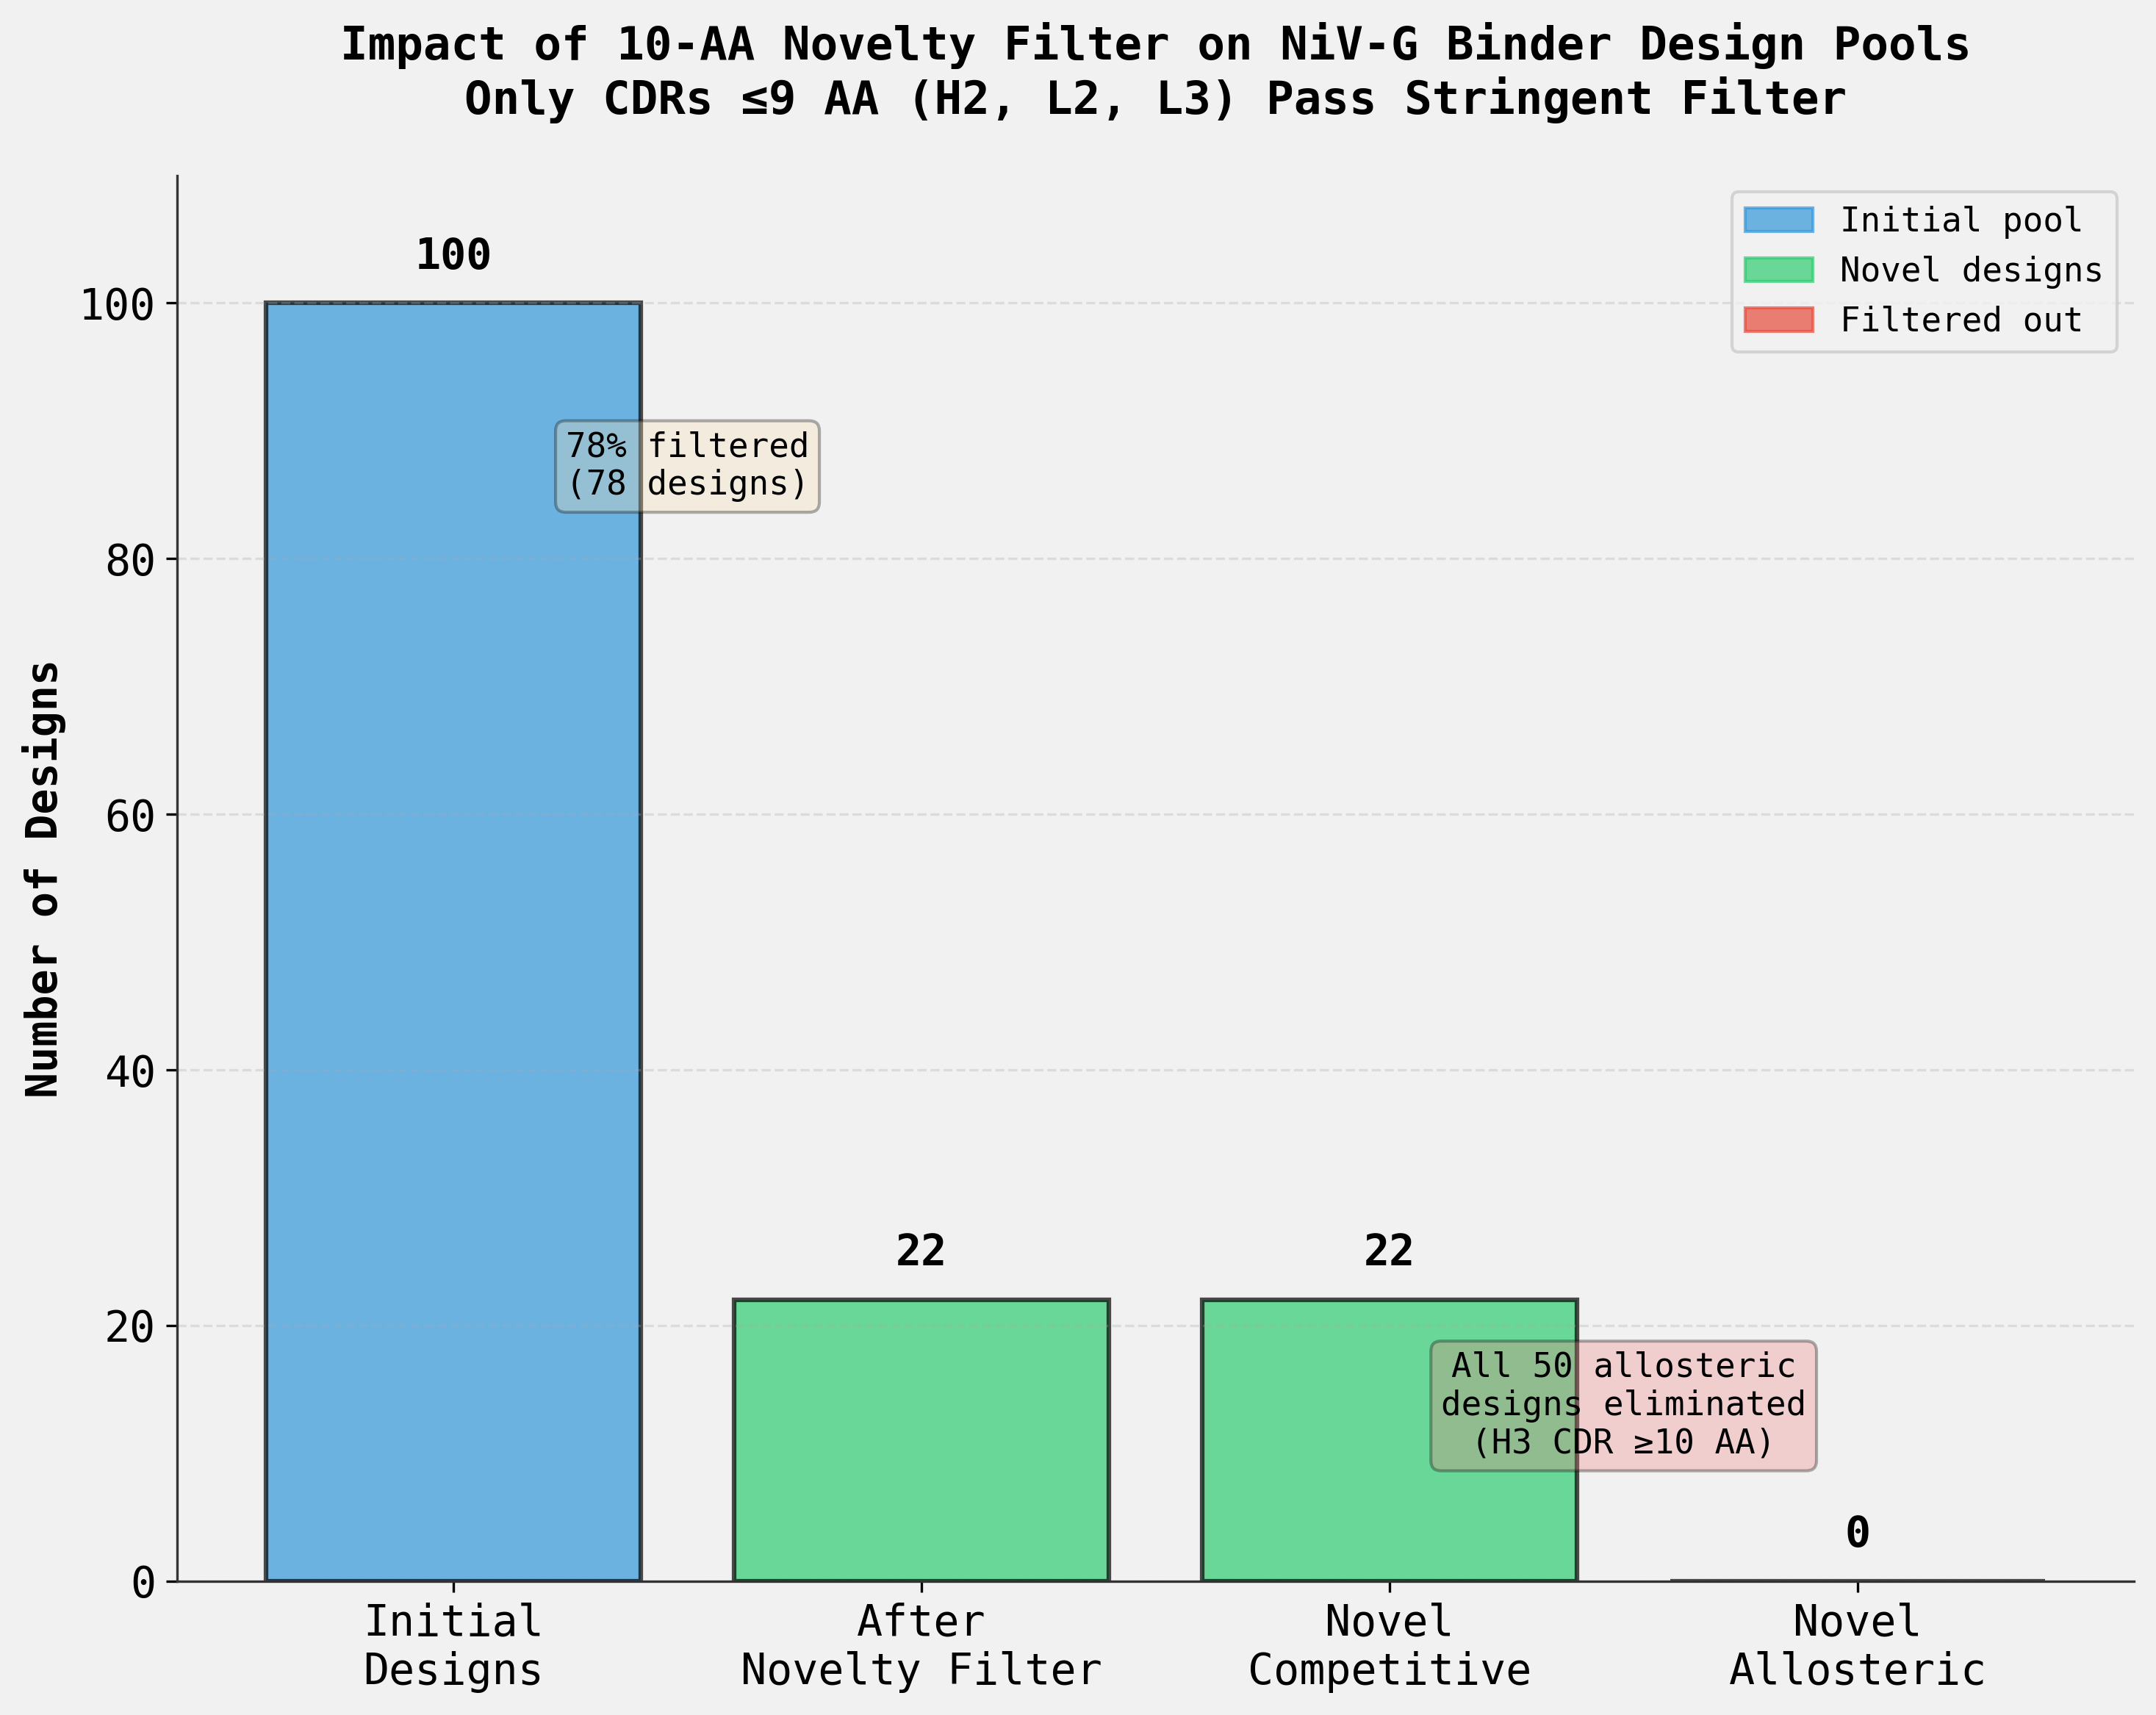

In [ ]:

# Create a final summary figure showing the key results
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a single figure with key results
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Data for visualization
categories = ['Initial\nDesigns', 'After\nNovelty Filter', 'Novel\nCompetitive', 'Novel\nAllosteric']
values = [100, 22, 22, 0]
colors = ['#3498db', '#2ecc71', '#2ecc71', '#e74c3c']

# Create bar chart
bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{val}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add annotations
ax.text(0.5, 85, '78% filtered\n(78 designs)', ha='center', fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
ax.text(2.5, 10, 'All 50 allosteric\ndesigns eliminated\n(H3 CDR ≥10 AA)', 
        ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))

# Styling
ax.set_ylabel('Number of Designs', fontsize=14, fontweight='bold')
ax.set_title('Impact of 10-AA Novelty Filter on NiV-G Binder Design Pools\n' + 
             'Only CDRs ≤9 AA (H2, L2, L3) Pass Stringent Filter',
             fontsize=15, fontweight='bold', pad=20)
ax.set_ylim(0, 110)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add legend
legend_elements = [
    mpatches.Patch(color='#3498db', alpha=0.7, label='Initial pool'),
    mpatches.Patch(color='#2ecc71', alpha=0.7, label='Novel designs'),
    mpatches.Patch(color='#e74c3c', alpha=0.7, label='Filtered out')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig('final_novelty_filter_results.png', dpi=300, bbox_inches='tight')
print("✓ Saved summary figure to 'final_novelty_filter_results.png'")
plt.show()
